Dataset shape: (1338, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Basic statistics (numeric):
           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

        

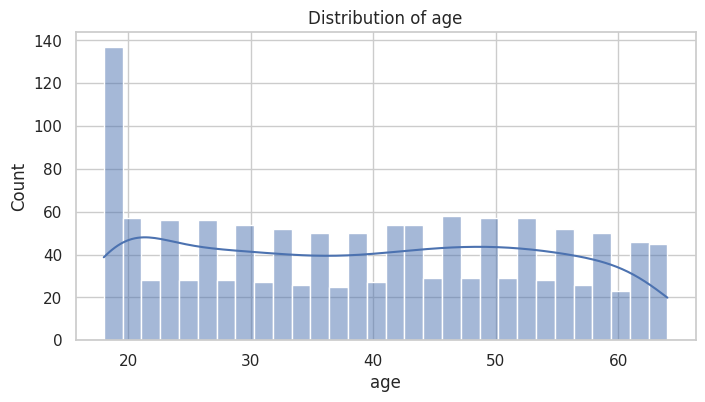

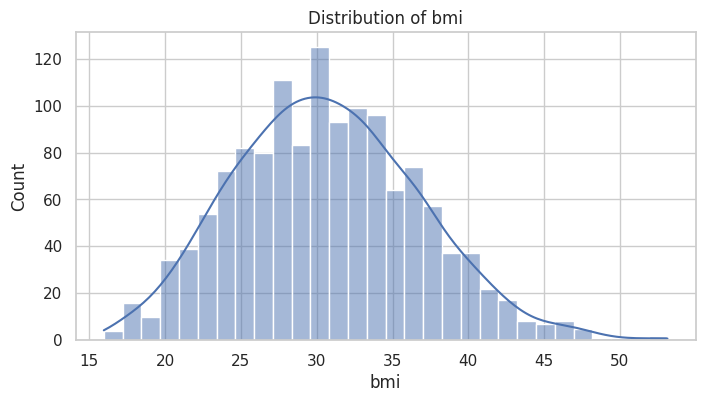

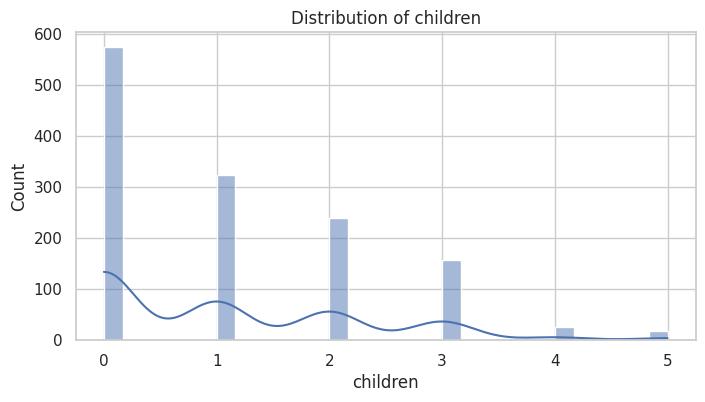

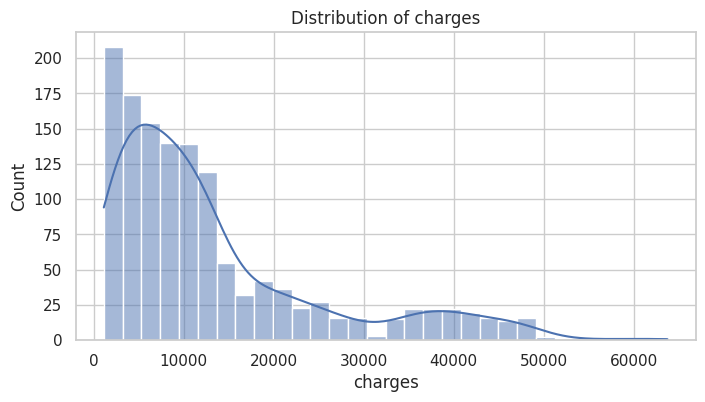

Categorical columns: ['sex', 'smoker', 'region']


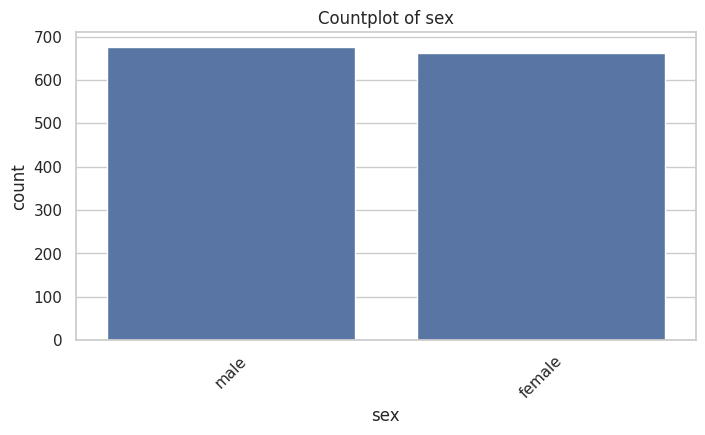

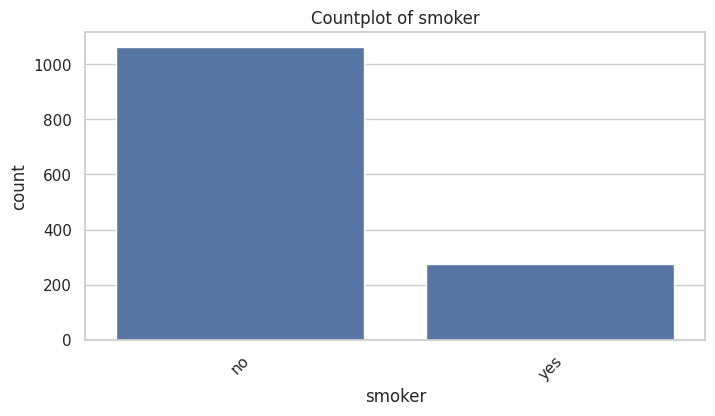

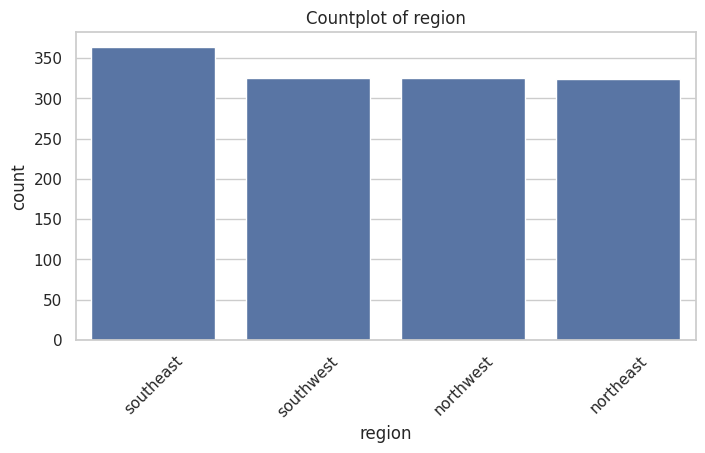

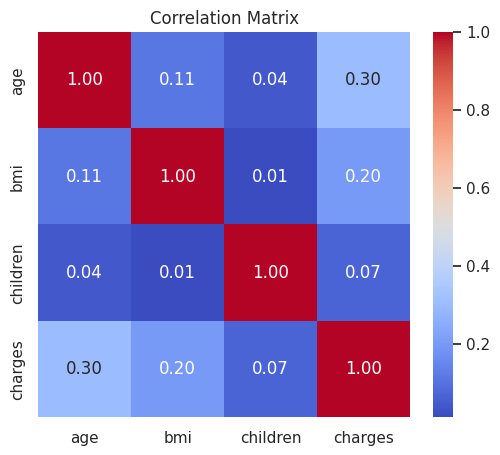

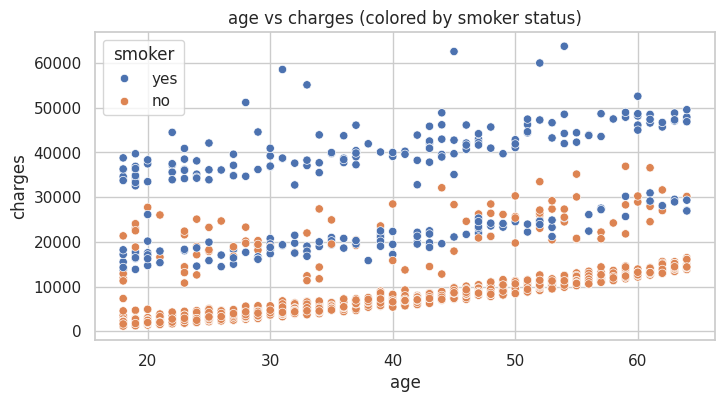

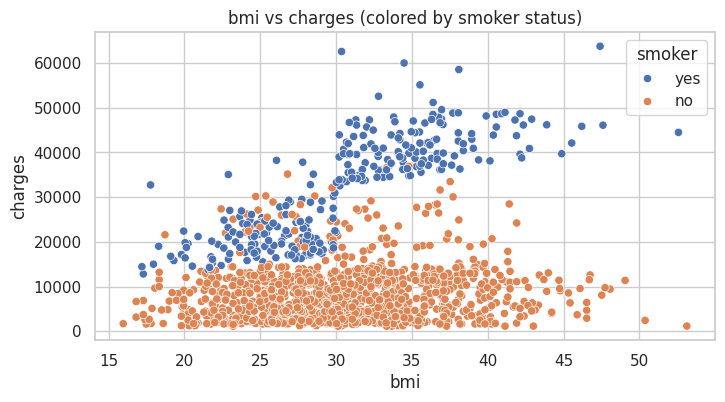

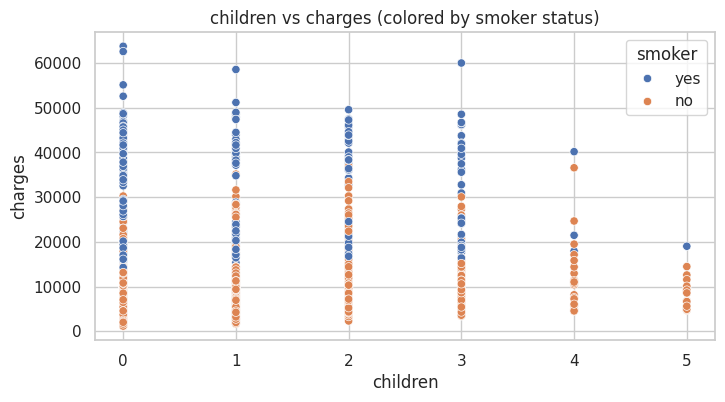

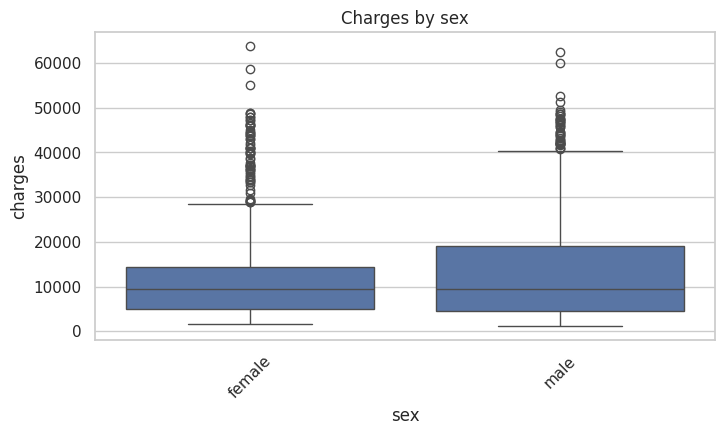

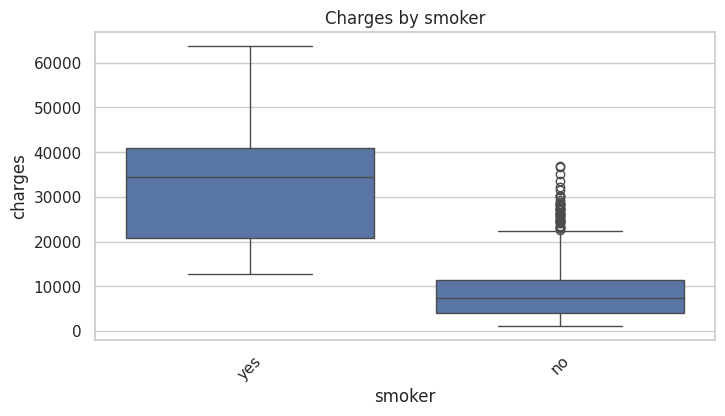

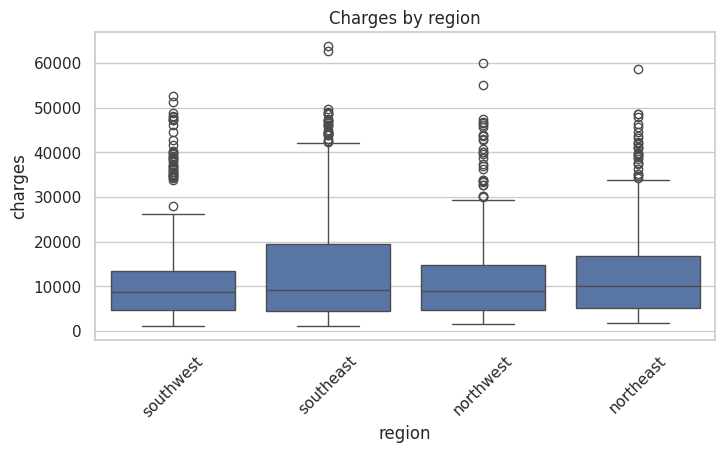

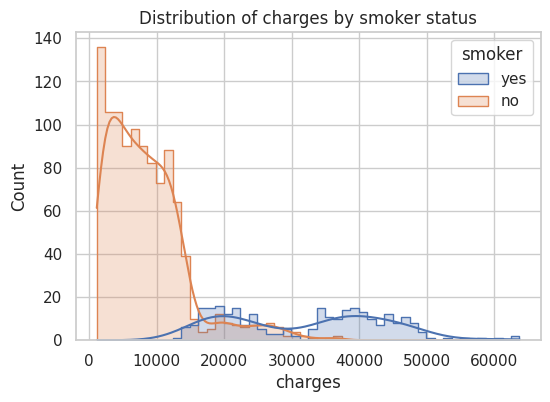

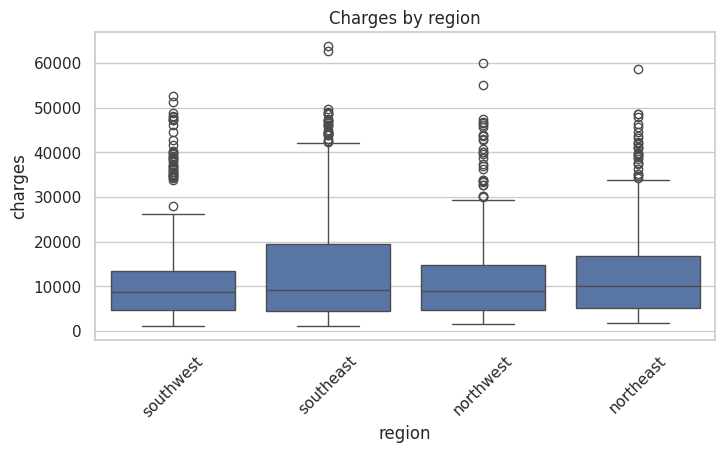

For bmi, lower bound = 13.70, upper bound = 47.29
Outliers in bmi: 9 (0.67%)

For charges, lower bound = -13109.15, upper bound = 34489.35
Outliers in charges: 139 (10.39%)



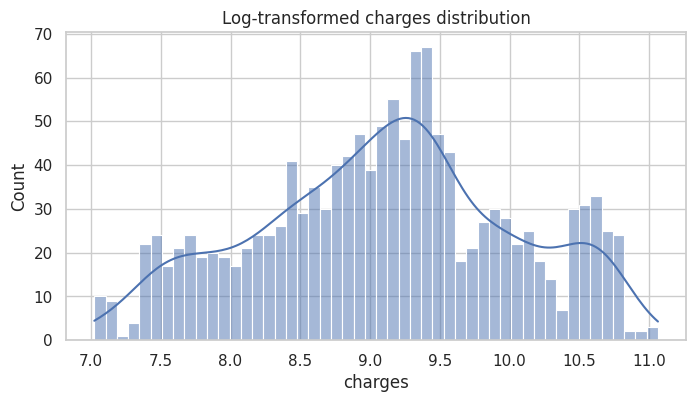

After encoding, shape: (1338, 9)
Train shape: (1070, 8)
Test shape: (268, 8)

Train charges summary:
count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

Test charges summary:
count      268.000000
mean     12968.317063
std      12483.196202
min       1131.506600
25%       4288.744850
50%       8487.880300
75%      16367.829375
max      63770.428010
Name: charges, dtype: float64


In [2]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
%matplotlib inline

# Step 1: Load the data
# Replace with correct path / URL of your medical_insurance_cost.csv
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
df.head()

# Step 2: Basic info
print("\nInfo:")
print(df.info())

print("\nBasic statistics (numeric):")
print(df.describe().T)

print("\nBasic statistics (all):")
print(df.describe(include='all').T)

# Step 3: Missing values & duplicates
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTotal duplicates:", df.duplicated().sum())

# Step 4: Univariate analysis

## Numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

## Categorical variables
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Step 5: Bivariate analysis

## Correlations among numeric variables
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Relationship of numeric features with charges (target)
for col in ['age', 'bmi', 'children']:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=col, y='charges', data=df, hue='smoker')
    plt.title(f"{col} vs charges (colored by smoker status)")
    plt.show()

## Boxplots for categorical features vs charges
for col in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f"Charges by {col}")
    plt.xticks(rotation=45)
    plt.show()

# Step 6: Distributions by groups

## Smoker vs Non-smoker charges
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='charges', hue='smoker', kde=True, bins=50, element='step')
plt.title("Distribution of charges by smoker status")
plt.show()

## Region effect
plt.figure(figsize=(8,4))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by region")
plt.xticks(rotation=45)
plt.show()

# Step 7: Data cleaning (if needed)
# e.g. any outliers, transformations

# Check for outliers via IQR or quantiles
for col in ['bmi', 'charges']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    print(f"For {col}, lower bound = {lower:.2f}, upper bound = {upper:.2f}")
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {outliers.shape[0]} ({100*outliers.shape[0]/df.shape[0]:.2f}%)\n")

# Maybe log-transform charges if it’s heavily skewed
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['charges']), bins=50, kde=True)
plt.title("Log-transformed charges distribution")
plt.show()

# Step 8: Encode categorical variables (for modeling)
df_encoded = pd.get_dummies(df, drop_first=True)
print("After encoding, shape:", df_encoded.shape)
df_encoded.head()

# Step 9: Split into train / test
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Step 10: Checking the target distribution in train/test
print("\nTrain charges summary:")
print(y_train.describe())
print("\nTest charges summary:")
print(y_test.describe())


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Verify encoding
df_encoded.head()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [6]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1070, 8)
Test set shape: (268, 8)


In [7]:
# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
# Load dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [10]:
y_log = np.log1p(y)  # log(1 + charges)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (1070, 8)
Test set: (268, 8)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae, rmse, r2 = evaluate_model(y_test, y_pred_test)
print(f"Linear Regression -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.4f}")


Linear Regression -> MAE: 0.270, RMSE: 0.419, R²: 0.8047


In [15]:
# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae_r, rmse_r, r2_r = evaluate_model(y_test, ridge_pred)

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae_l, rmse_l, r2_l = evaluate_model(y_test, lasso_pred)

print(f"Ridge -> MAE: {mae_r:.3f}, RMSE: {rmse_r:.3f}, R²: {r2_r:.4f}")
print(f"Lasso -> MAE: {mae_l:.3f}, RMSE: {rmse_l:.3f}, R²: {r2_l:.4f}")


Ridge -> MAE: 0.270, RMSE: 0.419, R²: 0.8047
Lasso -> MAE: 0.270, RMSE: 0.419, R²: 0.8044


In [16]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')
lin_cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='r2')

print("Average CV R² Scores:")
print(f"Linear Regression: {lin_cv_scores.mean():.4f}")
print(f"Ridge Regression:  {ridge_cv_scores.mean():.4f}")
print(f"Lasso Regression:  {lasso_cv_scores.mean():.4f}")


Average CV R² Scores:
Linear Regression: 0.7513
Ridge Regression:  0.7513
Lasso Regression:  0.7513


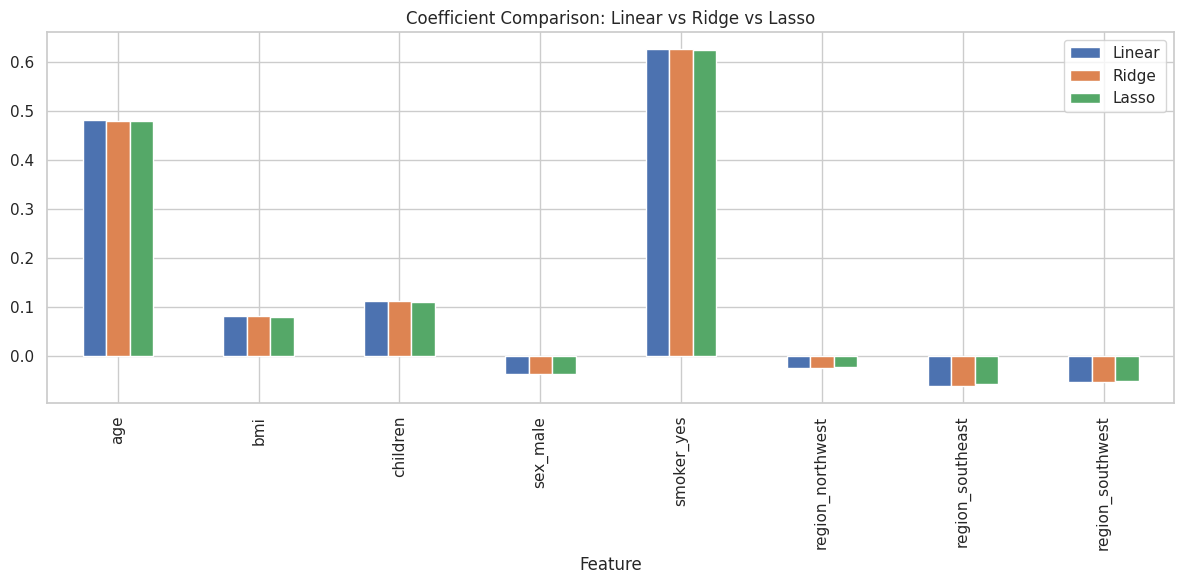

In [17]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lin_reg.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

coeff_df.set_index('Feature', inplace=True)
coeff_df.plot(kind='bar', figsize=(12,6))
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.tight_layout()
plt.show()


In [18]:
# Convert log predictions back to original scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(ridge_pred)  # using Ridge as optimized model

mae, rmse, r2 = evaluate_model(y_test_exp, y_pred_exp)
print(f"Final Ridge Model on Original Scale -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


Final Ridge Model on Original Scale -> MAE: 3885.18, RMSE: 7799.13, R²: 0.6082
